### importamos las librerias a utilizar

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import os

2023-01-31 09:43:41.218602: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-31 09:43:41.789855: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/lib/
2023-01-31 09:43:41.789887: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-31 09:43:43.818652: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No suc

### Preparacion de espacio de trabajo

especificamos la ruta de nuestro dataset, un arreglo para guardar las categorias que vayamos encontrando y la dimension a trabajar con nuestras imagenes

In [8]:
DATADIR = '/home/lenin/Documents/datasets/colores'
CATEGORIES = []
IMG_SIZE=28

recorremos el direcotorio excluyendo las imagenes de testeo

In [9]:
for cate in os.listdir(DATADIR):
    if cate == 'testimg': continue
    CATEGORIES.append(cate)
print(f'categorias encontradas: {CATEGORIES}\n total: {len(CATEGORIES)}')

categorias encontradas: ['blanco', 'verde', 'gris', 'negro', 'azul', 'amarillo', 'cafe', 'naranja', 'rosado', 'morado', 'rojo', 'celeste']
 total: 12


### Recoleccion de datos
recorremos el directorio tomando cada imagen segun su respectiva categoria

In [10]:
training_data=[] #var para los datos recolectados
labels=0
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for fname in os.listdir(path):
        img = load_img((path+'/'+fname), target_size=(IMG_SIZE,IMG_SIZE))
        x = img_to_array(img)
        x=x/255
        training_data.append([x,labels])
    labels+=1
print('done')

/home/lenin/Apps/anaconda3/lib/python3.9/site-packages/PIL/Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


done


verificamos el total de datos que tenemos

In [12]:
lenofimage = len(training_data)
print(lenofimage)

2400


### Tratamiento de los datos
separamos  nuestra data en img-labels y los tratamos con numpy

In [14]:
X=[]
y=[]
for img, label in training_data:
    X.append(img)
    y.append(label)
print('done')

done


verificamos la forma de nuestra data

In [15]:
X=np.array(X)
y=np.array(y)
print('labels',y.shape)
print('img',X.shape)

labels (2400,)
img (2400, 28, 28, 3)


dividimos la data para train y test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(f'train: {len(X_train)}, test: {len(X_test)}')

train: 1800, test: 600


### Creacion del modelo
creamos la arquitectura del modelo, lo compilamos y finalmente ajustamos

In [17]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='SAME', input_shape=X_train[0].shape),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(15, activation='relu'),
    Dense(len(CATEGORIES), activation='softmax'),
])

2023-01-31 09:58:41.426302: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/lenin/.local/lib/python3.9/site-packages/cv2/../../lib64::/lib/
2023-01-31 09:58:41.426610: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-31 09:58:41.426653: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (manjaropc): /proc/driver/nvidia/version does not exist
2023-01-31 09:58:41.427849: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate co

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 32)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2592)              0         
                                                                 
 dense (Dense)               (None, 15)                38895     
                                                                 
 dense_1 (Dense)             (None, 12)                192       
                                                                 
Total params: 39,983
Trainable params: 39,983
Non-trainable params: 0
____________________________________________________

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, batch_size=20)

Epoch 1/15
90/90 [==============================] - 2s 9ms/step - loss: 1.7604 - accuracy: 0.4100
Epoch 2/15
90/90 [==============================] - 1s 9ms/step - loss: 0.7872 - accuracy: 0.7622
Epoch 3/15
90/90 [==============================] - 1s 10ms/step - loss: 0.4748 - accuracy: 0.8661
Epoch 4/15
90/90 [==============================] - 1s 9ms/step - loss: 0.3408 - accuracy: 0.8961
Epoch 5/15
90/90 [==============================] - 1s 9ms/step - loss: 0.2800 - accuracy: 0.9083
Epoch 6/15
90/90 [==============================] - 1s 10ms/step - loss: 0.2549 - accuracy: 0.9189
Epoch 7/15
90/90 [==============================] - 1s 10ms/step - loss: 0.2778 - accuracy: 0.9022
Epoch 8/15
90/90 [==============================] - 1s 9ms/step - loss: 0.2147 - accuracy: 0.9206
Epoch 9/15
90/90 [==============================] - 1s 9ms/step - loss: 0.2185 - accuracy: 0.9244
Epoch 10/15
90/90 [==============================] - 1s 9ms/step - loss: 0.2003 - accuracy: 0.9311
Epoch 11/15
90/9

verificamos la prescicion en testeo

In [20]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('test loss',test_loss)
print('test accuracy',test_accuracy)

test loss 0.21036922931671143
test accuracy 0.925000011920929


### Probamos el modelo entrenado

1/1 [==============================] - 0s 29ms/step
prediccion = naranja


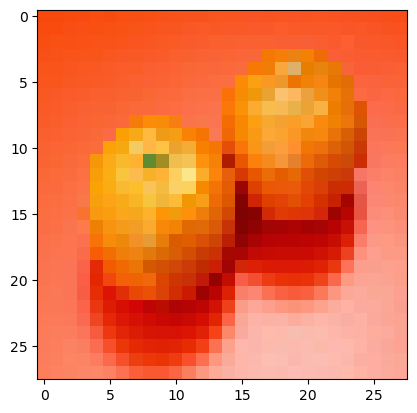

In [23]:
#ruta a nuestras imagenes de test en el directorio, no de la data preparada
path = DATADIR + '/testimg' + '/49.jpg' 

#tratamos la img con el mismo tamanio y la normalizamos
img = load_img(path, target_size=(IMG_SIZE,IMG_SIZE))
x = img_to_array(img)
x=x/255

#agrego un eje para que el modelo lo reciba
x = x[np.newaxis, ...]

#imprimo la img y la prediccion
plt.imshow(img)
resp = model.predict(x)
print(f'prediccion = {CATEGORIES[np.argmax(resp[0])]}')

### Exportacion
con el modelo ya funcionando correctamente, lo exportamos para poder utilizarlo en otros proyectos

In [24]:
model.save('mod_color_v1.h5')